<a href="https://colab.research.google.com/github/PietroDF/Computer_vision/blob/master/Object_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Task

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras

Using TensorFlow backend.


# Dataset

## Horse vs Humans dataset

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-03-23 09:16:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 2607:f8b0:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   144MB/s    in 1.0s    

2020-03-23 09:16:19 (144 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_horse_names = os.listdir(train_horse_dir)

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
train_human_names = os.listdir(train_human_dir)

In [0]:
num_img = 400
train_test_ratio = 0.8

next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[:num_img]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[:num_img]]

x_train = []
y_train = []
x_test = []
y_test = []

for i, img_path in enumerate(next_horse_pix):

  img = mpimg.imread(img_path)
  if i<train_test_ratio*num_img:
    x_train.append(img)
    y_train.append([0])
  else:
    x_test.append(img)
    y_test.append([0])

for i, img_path in enumerate(next_human_pix):
  
  img = mpimg.imread(img_path)
  if i<train_test_ratio*num_img:
    x_train.append(img)
    y_train.append([1])
  else:
    x_test.append(img)
    y_test.append([1])

print(np.shape(x_train), np.shape(x_test))

(640, 300, 300, 4) (160, 300, 300, 4)


In [0]:
x_train_binary = np.asarray(x_train)[:,:,:,:3]
x_test_binary = np.asarray(x_test)[:,:,:,:3]
y_train_binary = np.asarray(y_train)
y_test_binary = np.asarray(y_test)

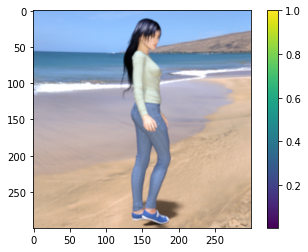

In [0]:
plt.imshow(x_train_binary[500])
plt.colorbar()
plt.show()

## Cifar-10 dataset

In [0]:
from keras.datasets import cifar10 as image_dataset

(x_train, y_train), (x_test, y_test) = image_dataset.load_data()

In [0]:
#selezione di 2 delle 10 classi presenti
binary_indexes_train = np.where((y_train == 5) | (y_train == 2))
binary_indexes_test = np.where((y_test == 5) | (y_test == 2))

x_train_binary = x_train[binary_indexes_train[0]]
x_test_binary = x_test[binary_indexes_test[0]]
y_train_binary = y_train[binary_indexes_train[0]]
y_test_binary = y_test[binary_indexes_test[0]]

In [0]:
y_train_binary = np.where(y_train_binary==2, 0, 1)
y_test_binary = np.where(y_test_binary==2, 0, 1)  

# Pre-processing feature

### One Hot Encoding

In [0]:
num_classi=2

# Convert class vectors to binary class matrices.
y_train_binary = keras.utils.to_categorical(y_train_binary, num_classi)
y_test_binary = keras.utils.to_categorical(y_test_binary, num_classi)

x_train_binary = x_train_binary.astype('float32')
x_test_binary = x_test_binary.astype('float32')

In [0]:
x_train_binary[:,:,:,1].max()

1.0

### Image normalization

In [0]:
# Normalize Image if necessary

for i in range(np.shape(x_train_binary)[-1]):
  
  x = (x_train_binary[:,:,:,i] - x_train_binary[:,:,:,i].min())/(x_train_binary[:,:,:,i].max() - x_train_binary[:,:,:,i].min() + 1e-7)
  x_train_binary[:,:,:,i] = x

  x = (x_test_binary[:,:,:,i] - x_test_binary[:,:,:,i].min())/(x_test_binary[:,:,:,i].max() - x_test_binary[:,:,:,i].min() + 1e-7)
  x_test_binary[:,:,:,i] = x

### Shuffle dataset

In [0]:
# Shuffle images

# Train
indices = np.arange(x_train_binary.shape[0])
np.random.shuffle(indices)

x_train_binary = x_train_binary[indices]
y_train_binary = y_train_binary[indices]

# Test
indices = np.arange(x_test_binary.shape[0])
np.random.shuffle(indices)

x_test_binary = x_test_binary[indices]
y_test_binary = y_test_binary[indices]

# Show some images

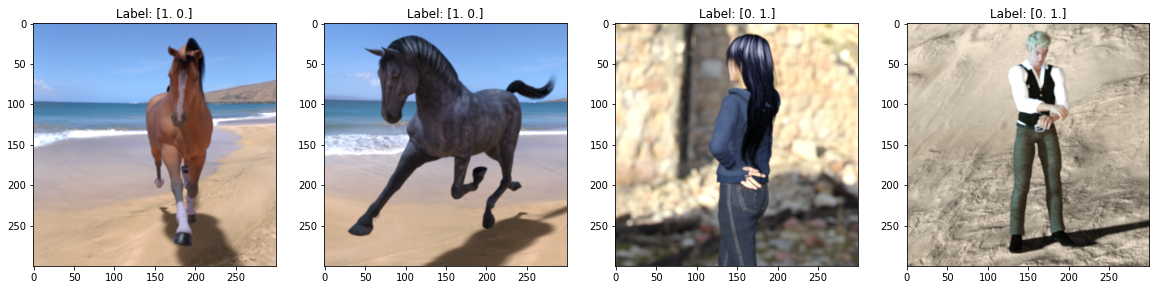

In [0]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(x_train_binary[1])
plt.title('Label: '+str(y_train_binary[1]))

plt.subplot(1,4,2)
plt.imshow(x_train_binary[2])
plt.title('Label: '+str(y_train_binary[2]))

plt.subplot(1,4,3)
plt.imshow(x_train_binary[3])
plt.title('Label: '+str(y_train_binary[3]))

plt.subplot(1,4,4)
plt.imshow(x_train_binary[4])
plt.title('Label: '+str(y_train_binary[4]))

plt.show()

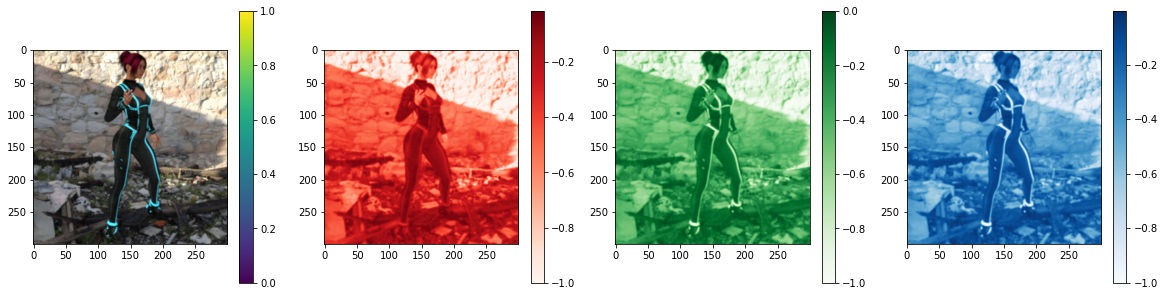

In [0]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

num_image_to_show = 5

fig = plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(x_train_binary[num_image_to_show])
plt.colorbar()

plt.subplot(1,4,2)
plt.imshow(-x_train_binary[num_image_to_show][:,:,0], interpolation='bicubic', cmap="Reds")
plt.colorbar()

plt.subplot(1,4,3)
plt.imshow(-x_train_binary[num_image_to_show][:,:,1], interpolation='bicubic', cmap="Greens")
plt.colorbar()

plt.subplot(1,4,4)
plt.imshow(-x_train_binary[num_image_to_show][:,:,2], interpolation='bicubic', cmap="Blues")
plt.colorbar()

plt.show()

# Model

In [0]:
img_shape = x_train_binary.shape[1:]
img_shape

(300, 300, 3)

## Set model

In [0]:
from keras import layers, models

# Parameteri del modello
num_filtri = 2
kernel_dim = (4,4)
pool_dim = (2,2)

dense_size = 128

padding_type = 'valid'

activation_type = 'relu'

# Create net
net = models.Sequential()

# Convoluzioni
net.add(layers.Conv2D(num_filtri, kernel_dim, padding=padding_type, activation='relu', input_shape=img_shape))
net.add(layers.MaxPooling2D(pool_dim, strides=2))

net.add(layers.Conv2D(num_filtri*2, kernel_dim, padding=padding_type, activation='relu'))
net.add(layers.MaxPooling2D(pool_dim,strides=2))

net.add(layers.Conv2D(num_filtri*4, kernel_dim, padding=padding_type, activation='relu'))
net.add(layers.MaxPooling2D(pool_dim,strides=2))

net.add(layers.Conv2D(num_filtri*8, kernel_dim, padding=padding_type, activation='relu'))
net.add(layers.MaxPooling2D(pool_dim,strides=2))

# Flatten
net.add(layers.Flatten())

# Dense
net.add(layers.Dense(dense_size, activation='relu'))
net.add(layers.Dense(num_classi, activation='sigmoid'))

# Compile net
net.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Explain net
net.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 2)       98        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 2)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 4)       132       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 8)         520       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 8)         0         
____________________

In [0]:
x_train_binary.shape, x_test_binary.shape, y_train_binary.shape, y_test_binary.shape

((640, 300, 300, 3), (160, 300, 300, 3), (640, 2), (160, 2))

## Train model

In [0]:
# Train
batch_size_value = 32
epochs_value = 40

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

# keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

history = net.fit(x_train_binary, y_train_binary,
                  batch_size = batch_size_value,
                  epochs = epochs_value,
                  validation_data = (x_test_binary, y_test_binary),
                  shuffle = True,
                  callbacks=[early_stopping]
                  )




Train on 640 samples, validate on 160 samples
Epoch 1/40





640/640 [==============================] - 26s 40ms/step - loss: 0.4672 - acc: 0.7922 - val_loss: 0.2181 - val_acc: 0.9219
Epoch 2/40
640/640 [==============================] - 25s 39ms/step - loss: 0.1734 - acc: 0.9344 - val_loss: 0.1139 - val_acc: 0.9688
Epoch 3/40
640/640 [==============================] - 25s 38ms/step - loss: 0.1010 - acc: 0.9641 - val_loss: 0.0845 - val_acc: 0.9625
Epoch 4/40
640/640 [==============================] - 25s 38ms/step - loss: 0.0917 - acc: 0.9641 - val_loss: 0.0995 - val_acc: 0.9563
Epoch 5/40
640/640 [==============================] - 25s 38ms/step - loss: 0.0655 - acc: 0.9758 - val_loss: 0.0752 - val_acc: 0.9688
Epoch 6/40
640/640 [==============================] - 25s 38ms/step - loss: 0.0397 - acc: 0.9891 - val_loss: 0.0968 - val_acc: 0.9625
Epoch 7/40
640/640 [==============================] - 25s 39ms/step - loss: 0.0389 - acc: 0.9828 - val_loss: 0.0608 - val_acc: 0.9688
Epoch 8/

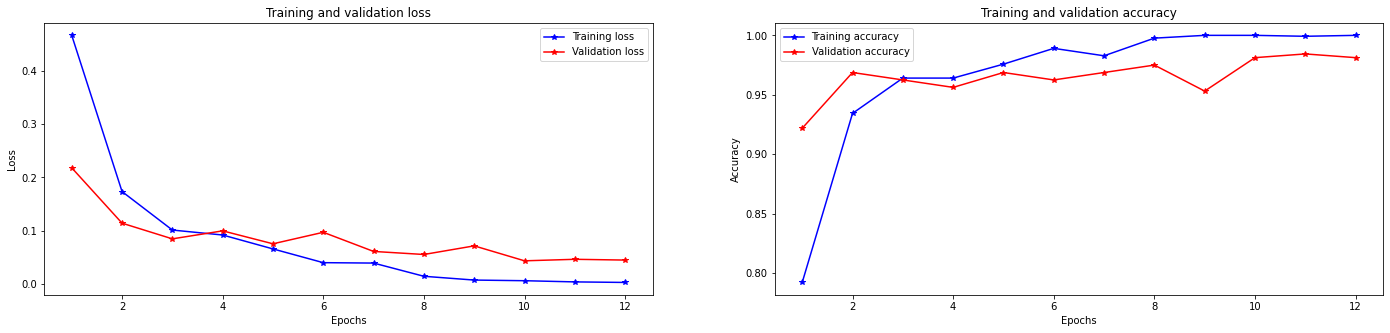

In [0]:
# Plot Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(24,5))

plt.subplot(1,2,1)
plt.plot(epochs, loss, '-*b', label='Training loss')
plt.plot(epochs, val_loss, '-*r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.subplot(1,2,2)
plt.plot(epochs, acc, '-*b', label='Training accuracy')
plt.plot(epochs, val_acc, '-*r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
net.input, net.layers, x_train_binary[4:5].shape

(<tf.Tensor 'conv2d_1_input:0' shape=(?, 300, 300, 3) dtype=float32>,
 (1, 300, 300, 3))

In [0]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in net.layers]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = keras.models.Model(inputs = net.input, outputs = successive_outputs)

In [0]:
#(layer_names,'*', feature_map, '*', len(feature_map.shape), '*', net.input, '*', successive_outputs)

In [0]:
conv_cmap = 'binary'
dense_cmap = 'viridis'

In [0]:
for i in range(2):

  print('\n'*3+'+---'*40+'+'+'\n'*3)

  casuale = np.random.randint(0,x_train_binary.shape[0]-1)
  img = x_train_binary[casuale:casuale+1]

  # Let's run our image through our network, thus obtaining all
  # intermediate representations for this image.
  successive_feature_maps = visualization_model.predict(img)

  # Plot image
  fig = plt.figure(figsize=(20, 5))

  # Immagine originale
  plt.subplot(1, 4, 1)
  plt.imshow(img[0])

  plt.subplot(1, 4, 2) # canale R
  plt.imshow(-img[0][:,:,0], cmap="Reds")

  plt.subplot(1, 4, 3) # canale G
  plt.imshow(-img[0][:,:,1], cmap="Greens")

  plt.subplot(1, 4, 4) # canale B
  plt.imshow(-img[0][:,:,2], cmap="Blues")

  plt.show()

  # These are the names of the layers, so can have them as part of our plot
  layer_names = [layer.name for layer in net.layers]

  # Now let's display our representations
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    print('\nLayer name: '+str(layer_name)+' - feature_map_shape: '+str((feature_map.shape))+' - num_filtri: '+str((feature_map.shape[-1])))
    
    # conv / maxpool layers: the feature map has 4 dimensions: (batch, row_size, col_size, filtri)
    if len(feature_map.shape) == 4:

      # Extract informations

      row_size = feature_map.shape[1] #row
      col_size = feature_map.shape[2] #col
      n_filtri = feature_map.shape[3] #numero filtri (num kernel)

      # We will tile our images in this matrix
      display_grid = np.zeros((row_size, col_size * n_filtri))

      for kernel in range(n_filtri):

        image_batch_num = 0 # passo una sola immagine per volta, quindi indice 0

        x = feature_map[image_batch_num, :, :, kernel]

        x = (x-x.min())/(x.max()-x.min()+0.00000001)

        # We'll tile each filter into this big horizontal grid
        display_grid[:, kernel * col_size : (kernel + 1) * col_size] = x

      # Display the grid
      scale = 5
      plt.figure(figsize=(scale * n_filtri, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='binary')
      plt.colorbar()
      plt.show()

    # flatten o dense: the feature map has shape (1, size)
    if len(feature_map.shape) == 2: 

        n_filtri = feature_map.shape[0] # in flatten/dense n_filri = 1 sempre

        col_size = feature_map.shape[1]

        x = np.zeros((1,col_size))
        x[0,:] = feature_map[0] #tipicamente flatten_map = [[a,b,c,d]], così unnesto
        x = (x-x.min())/(x.max()-x.min()+0.00000001)

        display_grid = np.zeros((1, col_size*n_filtri))
        display_grid[0,:] = x 
        
        # cambio scala se è flatten/dense_intermedio o dense_finale
        scale = 30 if col_size>num_classi else 4 

        # Display the grid
        plt.figure(figsize=(scale, 3))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='binary')
        plt.colorbar()
        plt.show()

net.summary()

# Average hidden representation

## Calcolo delle predizioni

In [0]:
# Primo layer di pooling
first_pool_dim_row = visualization_model.output_shape[1][1] # primo layer
first_pool_dim_col = visualization_model.output_shape[1][2] # primo layer

first_pool_x = np.zeros((num_classi, first_pool_dim_row, first_pool_dim_col))

# Ultimo layer di pooling
last_pool_dim_row = visualization_model.output_shape[-4][1] # quartultimo layer
last_pool_dim_col = visualization_model.output_shape[-4][2] # quartultimo layer

last_pool_x = np.zeros((num_classi, last_pool_dim_row, last_pool_dim_col))

# Il flatten è il terzultimo layer
flatten_dimension = (num_classi, visualization_model.output_shape[-3][1]) # terzultimo/num_colonne
flatten_x = np.zeros(flatten_dimension)

# Il dense l'ho definito come parametro
dense_x = np.zeros((num_classi,dense_size))

# Ultimo layer di classificazione
class_x = np.zeros((num_classi, 2)) # 2 perchè booleano (appartiene o no) - sigmoide!

# Contatore di etichette classificate
label_counter = np.zeros(num_classi)

num_image_to_classify = 20
for i in range(np.min([num_image_to_classify,x_train_binary.shape[0]-1])):

  casuale = np.random.randint(0,x_train_binary.shape[0]-1)
  img = x_train_binary[casuale:casuale+1]
  label = int(y_train_binary[casuale][0])

  # Aggiorna quante immagini classificate per ogni classe
  label_counter[label] += 1
    
  # Let's run our image through our network, thus obtaining all
  # intermediate representations for this image.
  successive_feature_maps = visualization_model.predict(img)

  # These are the names of the layers, so can have them as part of our plot
  layer_names = [layer.name for layer in net.layers]

  # Now let's display our representations
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    # max_pooling2d_4 (MaxPooling2 (None, 18, 18, 16)

    # convolution o pooling: the feature map has shape (1, row_size, col_size, num_filtri)
    if len(feature_map.shape) == 4: 

      # Prendo il primo layer di pooling (posizione 1 nella struttura della rete)
      if layer_name == layer_names[1]:

        # Sommo il risutlato parziale di ciascun filtro (ad es. 1/16)
        for filtro in range(feature_map.shape[3]):

          x = np.zeros((first_pool_dim_row, first_pool_dim_col))
          x[:,:] = feature_map[0,:,:,filtro]
          x = (x-x.min())/(x.max()-x.min()+1e-7)

          first_pool_x[label,:,:] += x/feature_map.shape[3]

      # Prendo il quartultmo layer di pooling
      if layer_name == layer_names[-4]:

        # Sommo il risutlato parziale di ciascun filtro (ad es. 1/16)
        for filtro in range(feature_map.shape[3]):

          x = np.zeros((last_pool_dim_row, last_pool_dim_col))
          x[:,:] = feature_map[0,:,:,filtro]
          x = (x-x.min())/(x.max()-x.min()+1e-7)

          last_pool_x[label,:,:] += x/feature_map.shape[3]

    # flatten o dense: the feature map has shape (1, size)
    if len(feature_map.shape) == 2: 

        n_filtri = feature_map.shape[0] # in flatten/dense n_filri = 1 sempre

        col_size = feature_map.shape[1]

        x = np.zeros((1,col_size))
        x[0,:] = feature_map[0] #tipicamente flatten_map = [[a,b,c,d]], così unnesto
        x = (x-x.min())/(x.max()-x.min()+1e-7)

        # Flatten layer
        if 'flat' in layer_name:
          flatten_x[label,:] += x[0]

        # Dense hidden layer
        if 'dense' in layer_name and np.shape(x)[1] == dense_size:
          dense_x[label,:] += x[0]

        # Dense output layer
        if 'dense' in layer_name and np.shape(x)[1] == num_classi:
          class_x[label,:] += x[0]

# Normalizzo i valori in base al numero di immagini esaminate per ciascuna classe
for classe in range(num_classi):

  first_pool_x[label,:,:] /= label_counter[classe] + 1e-7
  last_pool_x[classe] /= label_counter[classe] + 1e-7
  flatten_x[classe] /= label_counter[classe] + 1e-7
  dense_x[classe] /= label_counter[classe] + 1e-7
  class_x[classe] /= label_counter[classe] + 1e-7

## Plot average hidden representation

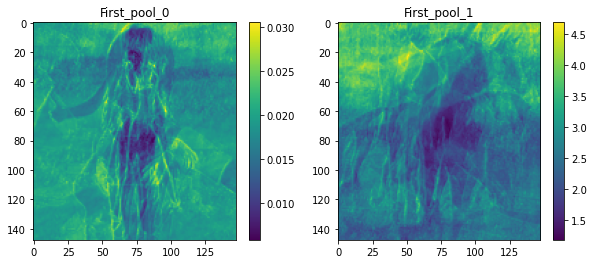

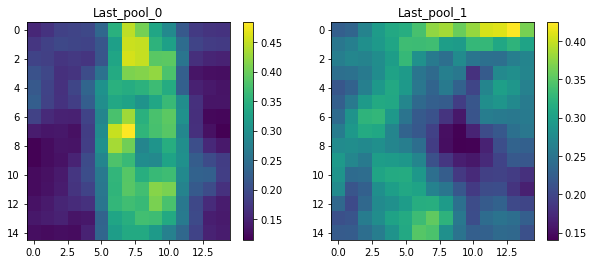

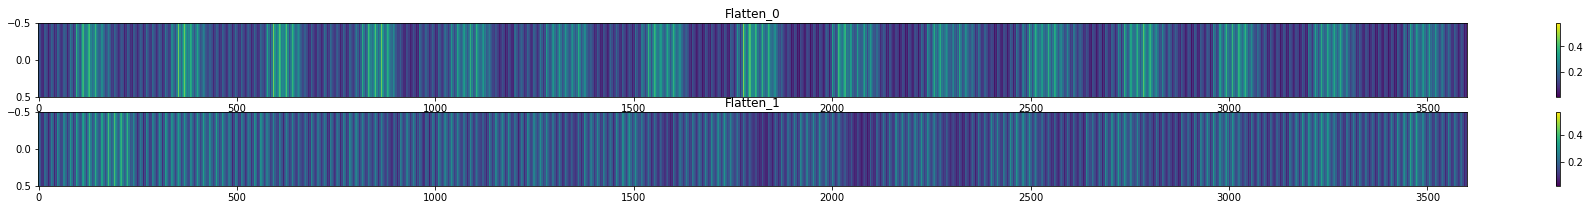

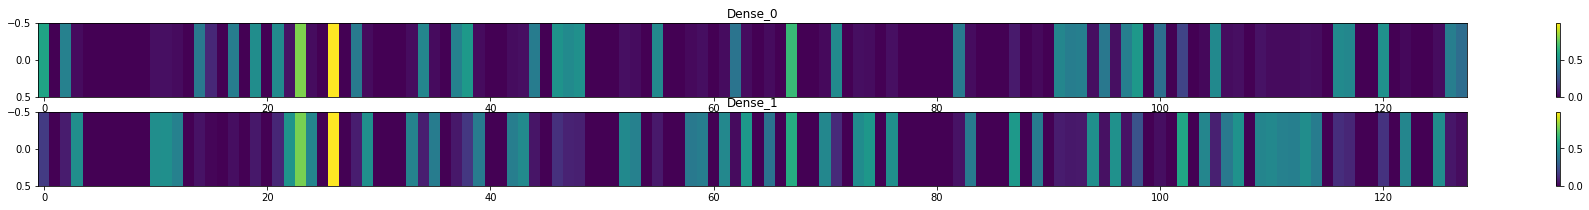

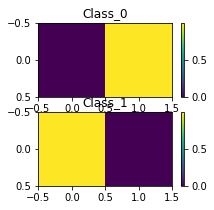

In [0]:
avg_cmap = 'viridis'
#avg_cmap = 'binary'

# Plot First pooling layer average representation
fig_x_dimension = 10
fig = plt.figure(figsize=(fig_x_dimension, fig_x_dimension/2.5))

for classe in range(num_classi):
  plt.subplot(1, num_classi,classe+1)
  plt.grid(False)
  plt.imshow(first_pool_x[classe], aspect='auto', cmap=avg_cmap)
  plt.colorbar()
  plt.title('First_pool_'+str(classe))

plt.show()

print('\n'*2)

# Plot Last pooling layer average representation
fig_x_dimension = 10
fig = plt.figure(figsize=(fig_x_dimension, fig_x_dimension/2.5))

for classe in range(num_classi):
  plt.subplot(1, num_classi,classe+1)
  plt.grid(False)
  plt.imshow(last_pool_x[classe], aspect='auto', cmap=avg_cmap)
  plt.colorbar()
  plt.title('Last_pool_'+str(classe))

plt.show()

print('\n'*2)

# Plot Flatten average representation
fig_x_dimension = 32
fig = plt.figure(figsize=(fig_x_dimension, 3))

for classe in range(num_classi):
  plt.subplot(num_classi,1,classe+1)
  plt.grid(False)
  plt.imshow(np.expand_dims(flatten_x[classe], axis=0), aspect='auto', cmap=avg_cmap)
  plt.colorbar()
  plt.title('Flatten_'+str(classe))

plt.show()

print('\n'*2)

# Plot Dense average layer
fig = plt.figure(figsize=(fig_x_dimension, 3))

for classe in range(num_classi):
  plt.subplot(num_classi,1,classe+1)
  plt.grid(False)
  plt.imshow(np.expand_dims(dense_x[classe], axis=0), aspect='auto', cmap=avg_cmap)
  plt.colorbar()
  plt.title('Dense_'+str(classe))

plt.show()

print('\n'*2)

# Plot Classification average layer
fig = plt.figure(figsize=(3, 3))

for classe in range(num_classi):
  plt.subplot(num_classi, 1, classe+1)
  plt.grid(False)
  plt.imshow(np.expand_dims(class_x[classe], axis=0), aspect='auto', cmap=avg_cmap)
  plt.colorbar()
  plt.title('Class_'+str(classe))

plt.show()

# Heatmap of image

In [0]:
from keras.preprocessing import image
import cv2

x = np.zeros((1,300,300,3))   

img_path = '/content/horse_pic.jpeg'
img_path = '/content/boy.jpeg'

img_name = img_path.split('.',1)[0].split('/',2)[-1]

img = image.load_img(img_path, target_size=(300, 300))
x[0,:,:,:] = image.img_to_array(img)

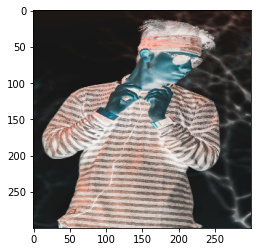

In [0]:
plt.imshow(1-x[0]/255)
plt.show()

In [0]:
x = x/255

In [0]:
preds = net.predict(x)

In [0]:
preds

array([[1., 0.]], dtype=float32)

In [0]:
np.argmax(preds[0])

0

In [0]:
net_output = net.output[:, np.argmax(preds[0])]

In [0]:
net_output

<tf.Tensor 'strided_slice_9:0' shape=(?,) dtype=float32>

In [0]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 2)       98        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 2)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 4)       132       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 8)         520       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 16)       

In [0]:
layer_name = 'conv2d_4'

In [0]:
cnn_layer = net.get_layer(layer_name)

In [0]:
num_filtri = net.get_layer(layer_name).output_shape[-1]
num_filtri

16

In [0]:
grads = keras.backend.gradients(net_output, cnn_layer.output)[0]

In [0]:
grads

<tf.Tensor 'gradients_2/max_pooling2d_4/MaxPool_grad/MaxPoolGrad:0' shape=(?, 31, 31, 16) dtype=float32>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


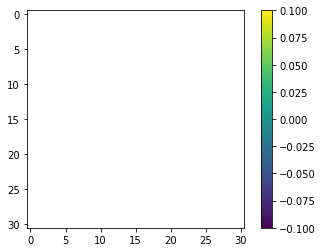

In [0]:
pooled_grads = keras.backend.mean(grads, axis=(0, 1, 2))

iterate = keras.backend.function([net.input],
                                [pooled_grads, cnn_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(num_filtri):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

plt.imshow(heatmap)
plt.colorbar()
plt.show()

In [0]:
pooled_grads

<tf.Tensor 'Mean_7:0' shape=(16,) dtype=float32>

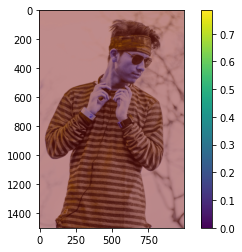

True

In [0]:
img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

alpha_weighted_average = 0.4 
superimposed_img = (heatmap * 0.4 + img * (1-alpha_weighted_average))/255

plt.imshow(superimposed_img)
plt.colorbar()
plt.show()

cv2.imwrite('/content/'+img_name+'heatmapped_img.jpg', superimposed_img)